In [1]:
import numpy as np
import pandas as pd

In [2]:
data_death = pd.read_csv('time_series_covid19_deaths_global.csv')
data_recover = pd.read_csv('time_series_covid19_recovered_global.csv')
data_conf = pd.read_csv('time_series_covid19_confirmed_global.csv')
data_death.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace=True)
data_recover.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace=True)
data_conf.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace=True)

In [3]:
death =  data_death.groupby('Country/Region').sum().reset_index()
recover =  data_recover.groupby('Country/Region').sum().reset_index()
confirm = data_conf.groupby('Country/Region').sum().reset_index()

# death

In [4]:
x_death = death.iloc[:, 1:-1].values
y_death = death.iloc[:, -1].values

In [5]:
x_recover = recover.iloc[:, 1:-1].values
y_recover = recover.iloc[:, -1].values

x_confirm = confirm.iloc[:, 1:-1].values
y_confirm = confirm.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_death, y_death, test_size = 0.3)

In [8]:
dt = DecisionTreeRegressor()

In [9]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
y_pred_dt = dt.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error
print(mean_absolute_error(y_pred_dt, y_test))

3391.0175438596493


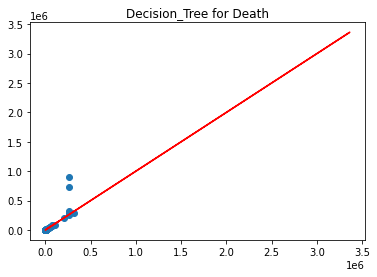

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_dt, y_test)
plt.plot(dt.predict(X_train), y_train, c='r')
plt.title("Decision_Tree for Death")
plt.show()

# Recover

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_recover, y_recover, test_size = 0.3)

In [14]:
dt = DecisionTreeRegressor()

In [15]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
y_pred_dt = dt.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error
print(mean_absolute_error(y_pred_dt, y_test))

36867.80701754386


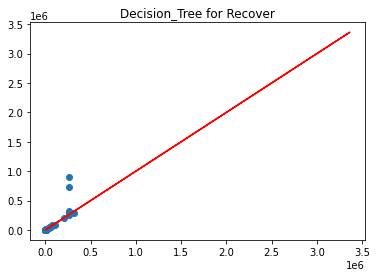

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_dt, y_test)
plt.plot(dt.predict(X_train), y_train, c='r')
plt.title("Decision_Tree for Recover")
plt.show()

# Confirm

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_confirm, y_confirm, test_size = 0.3)

In [20]:
dt = DecisionTreeRegressor()

In [21]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
y_pred_dt = dt.predict(X_test)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error
print(mean_absolute_error(y_pred_dt, y_test))

23232.877192982458


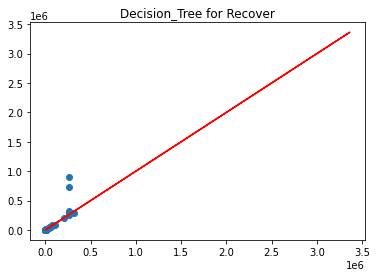

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_dt, y_test)
plt.plot(dt.predict(X_train), y_train, c='r')
plt.title("Decision_Tree for confirm")
plt.show()